# Метод наложения потенциальных потоков


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from incompr_flow import potential_flow as pf

Для визуализации линий тока, нужно создать расчетную область, где мы будем высчитывать скорость


In [3]:
N: int = 200                          
x_start, x_end = -4.0, 4.0            
y_start, y_end = -2.0, 2.0            
x = np.linspace(x_start, x_end, N)    
y = np.linspace(y_start, y_end, N)    
X, Y = np.meshgrid(x, y)   

Функция тока для исчточника (стока) в декартовой СК:
$$\psi_{source}(x,y) = \frac{\sigma}{2\pi}\arctan(\frac{y - y_{source}}{x - x_{source}})$$

компоненты скорости:
$$u_{source}(x,y) = \frac{\sigma}{2\pi}\frac{x - x_{source}}{(x - x_{source})^2 + (y - y_{source})^2}$$

$$v_{source}(x,y) = \frac{\sigma}{2\pi}\frac{y - y_{source}}{(x - x_{source})^2 + (y - y_{source})^2}$$

Создадим функции для расчета фукнции тока и компонент скорости

Функция тока прямолинейного потока:
$$\psi_{freestream}(x,y) = U_{\infty}(y\cos\alpha + x\sin\alpha)$$
Компоненты скорости:
$$u_{freestream}(x, y) = \frac{\partial \psi}{\partial y} = U_{\infty}\cos\alpha$$
$$v_{freestream}(x, y) = -\frac{\partial \psi}{\partial x} = -U_{\infty}\sin\alpha$$

Зададим начальные условия для прямолинейного потенциального потока

In [4]:
u_inf = 1.0
alpha = np.deg2rad(15.0)

Посчитаем скорость и функцию тока

In [5]:
u_freestream, v_freestream = pf.get_velocity(U=u_inf, alpha=alpha, N=N)
psi_freestream = pf.get_stream_function(U=u_inf, alpha=alpha, X=X, Y=Y)

Зададим начальные условия для источника

In [6]:
strength_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

Посчитаем скорость и функцию тока

In [8]:
u_source, v_source = pf.get_velocity_s(strength_source, x_source, y_source, X, Y)
psi_source = pf.get_stream_function_s(strength_source, x_source, y_source, X, Y)

Накладываем потенциальные потоки

$$\psi = \sum_{i=1}^n \psi_i$$

$$u = \sum_{i=1}^n u_i$$

$$v = \sum_{i=1}^n v_i$$

In [9]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

Давайте теперь посторим графики линии тока

(-2.0, 2.0)

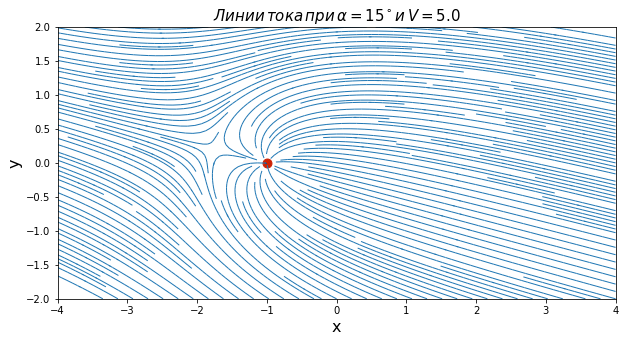

In [10]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))

plt.streamplot(X, Y, u, v, density=2.5, linewidth=1, arrowsize=1, arrowstyle='-')
plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

plt.title(r'$Линии \,тока \,при \,\alpha = 15^\circ и \,V = 5.0$', fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

Посчитаем давлениe
$$C_p = 1 - 	\left( \frac{V}{V_{\infty}} \right)^2$$

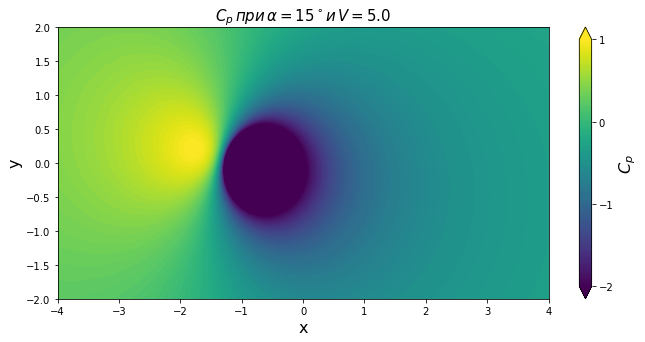

In [11]:
# compute the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))

plt.title(r'$C_p \,при \,\alpha = 15^\circ и \,V = 5.0$', fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

contf = plt.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([i for i in range(-2, 2)])

In [12]:
kappa = 1.0                        
x_doublet, y_doublet = 0.0, 0.0

In [15]:
u_doublet, v_doublet = pf.get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = pf.get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

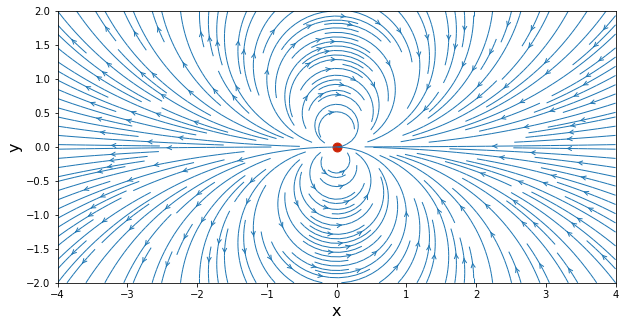

In [16]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');


In [17]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet


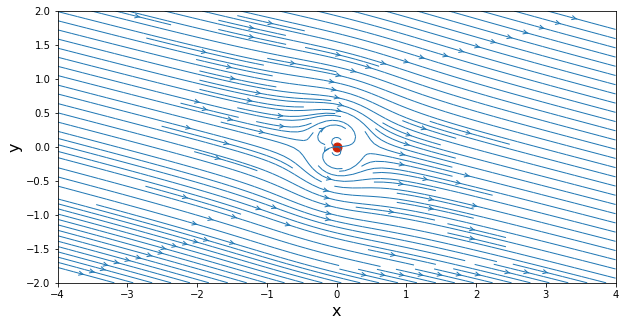

In [18]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

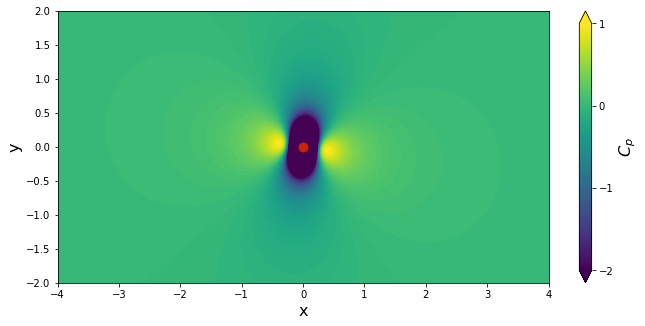

In [19]:
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')



---



---



Пусть у нас есть диполь с координатами (-1.0, 0.0) и моментом $$\gamma = 1.0$$
Также у нас есть источник с координатами (1.0, 0.0) и силой $$\sigma = 5.0$$
Расчитать поле давлений при $$U_{\infty} = 1.0$$ $$\alpha = 0.0^\circ$$

In [20]:
u_inf = 1.0
alpha = np.deg2rad(10.0)

In [22]:
u_freestream, v_freestream = pf.get_velocity(U=u_inf, alpha=alpha, N=N)
psi_freestream = pf.get_stream_function(U=u_inf, alpha=alpha, X=X, Y=Y)

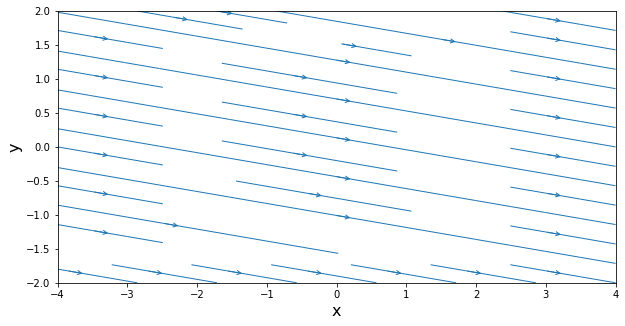

In [23]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_freestream, v_freestream,
                  density=.5, linewidth=1, arrowsize=1, arrowstyle='->')

In [28]:
kappa = 2.0                        
x_doublet, y_doublet = -1.0, -1.5

In [29]:
u_doublet, v_doublet = pf.get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = pf.get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

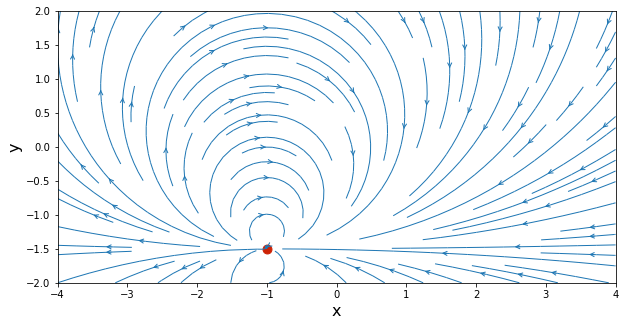

In [30]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet,
                  density=1, linewidth=1, arrowsize=1, arrowstyle='->')

plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

In [31]:
strength_source = 5.0            # strength of the source
x_source, y_source = 1.0, 0.   # location of the source

In [33]:
u_source, v_source = pf.get_velocity_s(strength_source, x_source, y_source, X, Y)
psi_source = pf.get_stream_function_s(strength_source, x_source, y_source, X, Y)

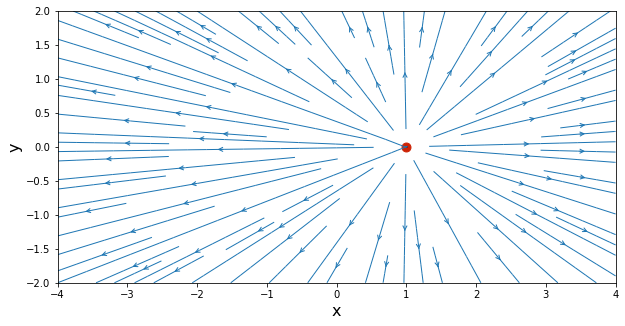

In [34]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_source, v_source,
                  density=1, linewidth=1, arrowsize=1, arrowstyle='->')

plt.scatter(x_source, y_source, color='#CD2305', s=80, marker='o')

In [35]:
u = u_freestream + u_doublet + u_source
v = v_freestream + v_doublet + v_source
psi = psi_freestream + psi_doublet + psi_source

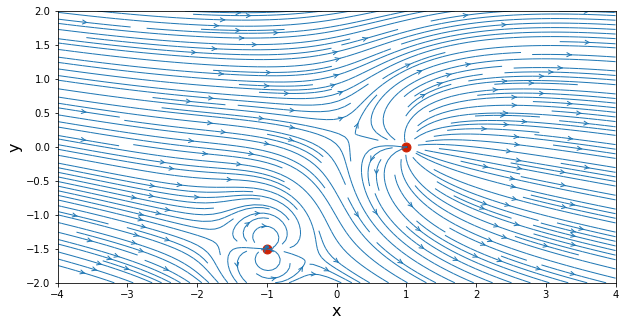

In [36]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')

plt.scatter([x_doublet, x_source], [y_doublet, y_source], color='#CD2305', s=80, marker='o')

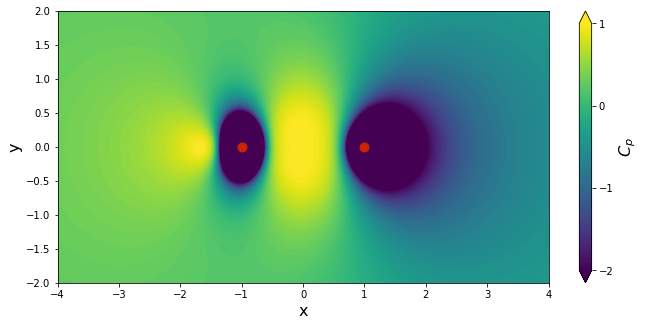

In [48]:
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(1.1 * width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
contf = plt.contourf(X, Y, cp,
                        levels=np.linspace(-2.0, 1.0, 100), extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.scatter([x_doublet, x_source], [y_doublet, y_source], 
            color='#CD2305', s=80, marker='o')